In [1]:
from ocik.structure.doPC import doPC
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch, K2Score
from graphviz import Digraph, Graph
from ocik.example import Asia, Room, Circuit

In [3]:
def draw(edge, directed=True):
    dot = Digraph() if directed else Graph()
    dot.edges(edge)
    return dot

def difference(gt, pred):
    f = Digraph()
    new_edges = [ed for ed in pred if ed not in gt]
    f.attr('edge', color='blue')
    f.edges(new_edges)

    missed_edges = [ed for ed in gt if ed not in pred]
    f.attr('edge', color='red')
    f.edges(missed_edges)

    recovered_edges = [ed for ed in pred if ed in gt]
    f.attr('edge', color='green')
    f.edges(recovered_edges)
    return f

In [12]:
asia = Asia()
df = asia.load_data(10)

In [13]:
orientation = set()
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=asia.bn,
                           orientation=orientation)


Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:31<00:10, 10.48s/it]


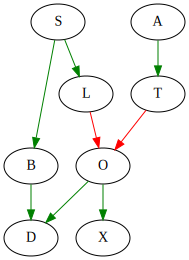

In [7]:
difference(asia.bn.G.edges(), list(orientation))

In [19]:
room = Room()
df = room.bn.sample(10)


100%|██████████| 10/10 [00:00<00:00, 237.87it/s]


In [20]:
orientation = set()
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=room.bn,
                           orientation=orientation)


Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:14<00:04,  4.74s/it]


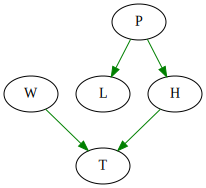

In [21]:
difference(room.bn.G.edges(), list(orientation))

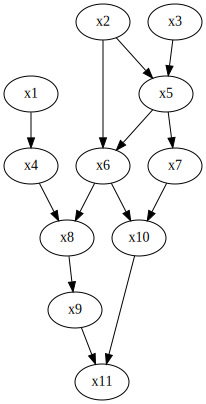

In [7]:

from ocik.network import BayesianNetwork

fn = lambda k, v: f"{k}={v}"
ed = lambda a, b: [f'x{a}', f'x{b}']

bn = BayesianNetwork([ed(1, 4), ed(4, 8), ed(8, 9), ed(9, 11),
                      ed(2, 5), ed(2, 6), ed(6, 8), ed(6, 10), ed(10, 11),
                      ed(3, 5), ed(5, 6), ed(5, 7), ed(7, 10)])

draw(bn.G.edges())

In [46]:
def fill(x, gate):
    val = int(x.name.split("=")[1])
    if len(x.index)==1:
        return [gate(x)[val]]
    if type(x.index[0])==tuple:
        return [int(gate(*idx)==val) for idx in x.index]
    else:
        return [int(gate(idx)==val) for idx in x.index]
    
rand = lambda x: lambda u: [x, 1-x]

circuit = [('x1',rand(0.5)), ('x2',rand(0.5)), ('x3',rand(0.5)), ('x4',f_not), ('x5',f_nand), 
           ('x6',f_and), ('x7',f_not), ('x8',f_xor), ('x9',f_not), ('x10',f_xor), ('x11',f_xor)]

for node, foo in circuit:
    cpd = bn.get_cpd(node)[1].apply(lambda x: fill(x, foo))
    bn._set_cpd(node, cpd)

In [52]:
orientation = set()
df=bn.sample(2)
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=bn,
                           orientation=orientation)

Working for n conditional variables: 4: 100%|██████████| 4/4 [06:35<00:00, 70.74s/it]/Users/kanva/workspace/telecom/projet_IA/causality_detection/ocik/structure/doPC.py:116: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [06:35<00:00, 98.89s/it]


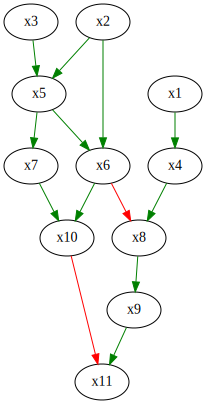

In [54]:
difference(bn.G.edges(), list(orientation))

In [59]:
df=bn.sample(10000)

100%|██████████| 10000/10000 [00:34<00:00, 293.51it/s]


Working for n conditional variables: 4: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]/Users/kanva/anaconda3/envs/projetia/lib/python3.8/site-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
/Users/kanva/anaconda3/envs/projetia/lib/python3.8/site-packages/pgmpy/base/DAG.py:885: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


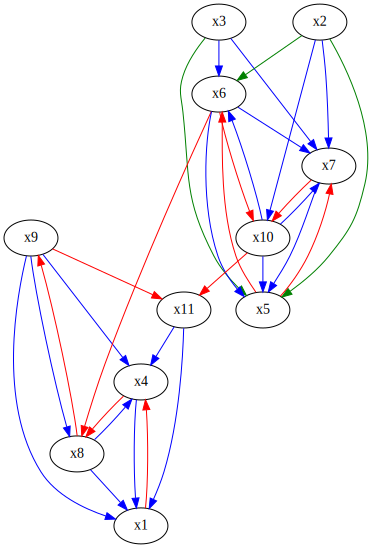

In [60]:
est = PC(data=df)
estimated_model = est.estimate(variant='stable', max_cond_vars=4)
difference(bn.G.edges(), estimated_model.edges())

  0%|          | 12/10000 [00:01<16:24, 10.14it/s] 


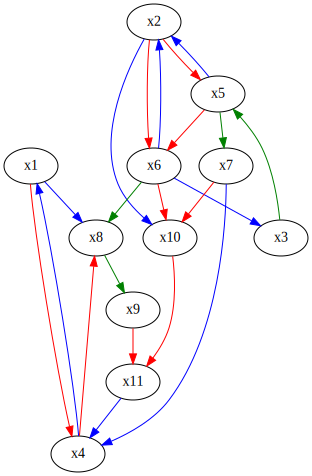

In [62]:
scoring_method = K2Score(data=df)
est = HillClimbSearch(data=df)
estimated_model = est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4))
difference(bn.G.edges(), estimated_model.edges())

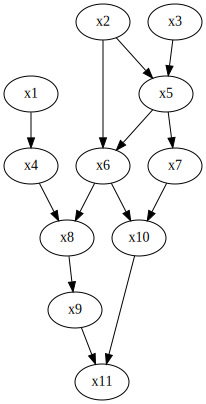

In [6]:
circuit = Circuit()
draw(circuit.bn())

In [ ]:
orientation = set()

estimator = doPC(data=dfx)
model = estimator.estimate(max_cond_vars=4,
                           env=bn,
                           orientation=orientation)